

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


Estou fazendo todo o projeto em inglês já para o portfolio

# Y.Afisha Delivery Analytics

In [1]:
#First step of all is importing libraries and files

import pandas as pd

visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [2]:
#Now we'll be checking how's our DataFrames


print('Visits:')
display(visits.head())
print(visits.info())
print()
print('\nOrders:')
display(orders.head())
print(orders.info())
print()
print('\nCosts:')
display(costs.head())
print(costs.info())

Visits:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


Orders:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


Costs:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


***

Now we'll be converting every date/time string to proper datetime objects and so on.

Also some columns to make it easier to group later on

***

In [3]:
# Visits table
visits['start_ts'] = pd.to_datetime(visits['Start Ts'])
visits['end_ts']   = pd.to_datetime(visits['End Ts'])

# Orders table
orders['purchase_ts'] = pd.to_datetime(orders['Buy Ts'])

# Costs table
costs['date'] = pd.to_datetime(costs['dt'])

In [4]:
#Visits
visits['session_date']  = visits['start_ts'].dt.date
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_month'] = visits['start_ts'].dt.to_period('M')
visits['session_year']  = visits['start_ts'].dt.year

#Orders
orders['order_date']  = orders['purchase_ts'].dt.date
orders['order_month'] = orders['purchase_ts'].dt.to_period('M')
orders['order_year']  = orders['purchase_ts'].dt.year

#Costs
costs['cost_month'] = costs['date'].dt.to_period('M')

In [5]:
#Checking if everything is running correctly

print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Device         359400 non-null  object        
 1   End Ts         359400 non-null  object        
 2   Source Id      359400 non-null  int64         
 3   Start Ts       359400 non-null  object        
 4   Uid            359400 non-null  uint64        
 5   start_ts       359400 non-null  datetime64[ns]
 6   end_ts         359400 non-null  datetime64[ns]
 7   session_date   359400 non-null  object        
 8   session_week   359400 non-null  UInt32        
 9   session_month  359400 non-null  period[M]     
 10  session_year   359400 non-null  int64         
dtypes: UInt32(1), datetime64[ns](2), int64(2), object(4), period[M](1), uint64(1)
memory usage: 29.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 col

Now everything looks okay, so we can move on to the next step.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


# Step 3 - Product‑usage Metrics (DAU, WAU, MAU)

In this step we'll be measuring how many unique users interact with the product on an average day, week, and month, then derive “stickiness” ratios.

**3.1  Daily Active Users (DAU)**

In [6]:
# • Counting unique user IDs each day
# • Taking the mean over the whole dataset



daily_users = visits.groupby('session_date')['Uid'].nunique()
mean_dau = daily_users.mean()
print(f'Average DAU: {mean_dau:.0f}')

Average DAU: 908


**3.2  Weekly Active Users (WAU)**

In [7]:
#• (This avoids mixing the last days of one year with the first days of the next)
#• Counting unique users each week



weekly_users = visits.groupby(['session_year', 'session_week'])['Uid'].nunique()
mean_wau = weekly_users.mean()
print(f'Average WAU: {mean_wau:.0f}')

Average WAU: 5716


**3.3  Monthly Active Users (MAU)**

In [8]:
# • Grouping by monthly period (YYYY‑MM)
# • Counting unique users per month
# • Computing the average MAU



monthly_users = visits.groupby('session_month')['Uid'].nunique()
mean_mau = monthly_users.mean()
print(f'Average MAU: {mean_mau:.0f}')

Average MAU: 23228


**3.4  Sticky Metrics (Engagement Ratios)**

In [9]:
# • sticky_wau  = DAU ÷ WAU - That's the proportion of weekly users who engage daily
# • sticky_mau  = DAU ÷ MAU - The proportion of monthly users who engage daily
# • Multiply by 100 so we can have the percentage



sticky_wau = mean_dau / mean_wau * 100
sticky_mau = mean_dau / mean_mau * 100

print(f'Sticky WAU: {sticky_wau:.1f}%')
print(f'Sticky MAU: {sticky_mau:.1f}%')

Sticky WAU: 15.9%
Sticky MAU: 3.9%




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Métricas sobre usuários devidamente calculadas!
</div>


# Step 4 - Session Counts and Session‑length Analysis

**4.1 Calculate session duration for every visit**

In [10]:
# Compute session length in seconds
# In this case we want a numeric measure of engagement per session

visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()


print(visits['session_duration_sec'].describe())

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64


***

In this case we received a negative number in duration, this could mean an error so will set it as NaN

***

Also, very long duration is not exactly a meaning of engament but the user leaving a tab opened.
The target, in general terms, is to maintain session in 5 min. avg.


**Let's try fixing data**

In [11]:
#Removing zeros or negative numbers/sessions
visits = visits[visits['session_duration_sec']>0]


#Now we'll recompute asl with the changes made
asl = visits['session_duration_sec'].mean()
print(f'Clean ASL: {asl:.1f} s  ({asl/60:.1f} min)')

Clean ASL: 714.2 s  (11.9 min)


In [12]:
#Before we move to the next step, let's check another insight here, the quantity of sessions by users


sessions_per_user_day = (
    visits.groupby(['session_date','Uid']).size()
          .rename('sessions_per_user_day')
)
print(sessions_per_user_day.describe())

count    297600.000000
mean          1.087379
std           0.371072
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: sessions_per_user_day, dtype: float64


***


**After cleaning, everything looks normal. Max of up to 10 sessions but a short amount**


***

**4.2 Count sessions per user per calendar day**

In [13]:
# Sessions each user triggered per day and spoting heavy and casual users

sessions_per_user_day = (visits.groupby(['session_date', 'Uid']).size().rename('sessions_per_user_day'))

print(sessions_per_user_day.head())

session_date  Uid               
2017-06-01    32197920403662046     1
              184148767273119549    2
              254239507810036143    1
              258099436367309303    1
              300776506671194537    1
Name: sessions_per_user_day, dtype: int64


**4.3 Plot the distribution of session durations**

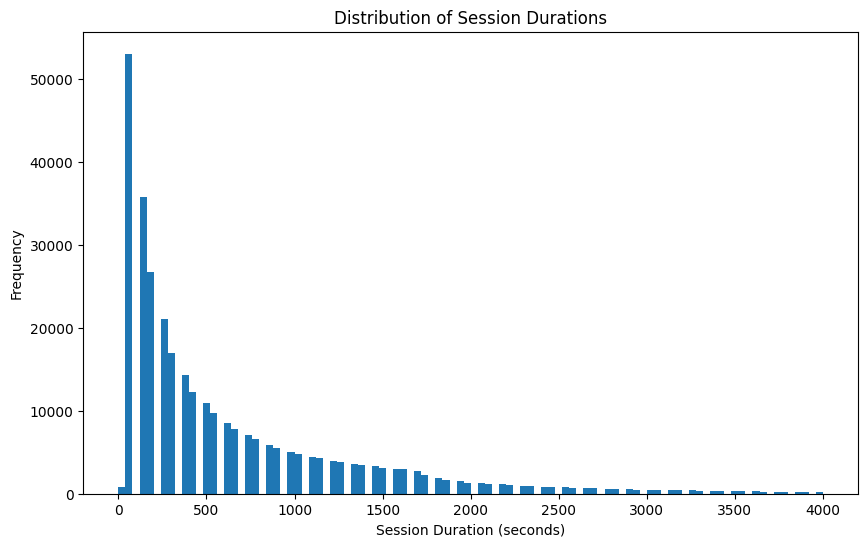

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(visits['session_duration_sec'], bins=100, range=(0, 4000))
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Durations')
plt.show()

**4.4 Compute Average Session Length (ASL)**

In [15]:
asl = visits['session_duration_sec'].mean()
print(f'Average Session Length (ASL): {asl:.1f} seconds '
      f'≈ {asl/60:.1f} minutes')

Average Session Length (ASL): 714.2 seconds ≈ 11.9 minutes




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo certo com a investigação sobre as sessões.
</div>


# Step 5 - Cohort Sizes & First-purchase Timing

*The goal here will be finding out when users convert, calculate cohort sizes, and later compute LTV*
***

**5.1 Identify each user’s first purchase month**

In [16]:
# 5.1 Determine first purchase month for every user
first_order = (orders.groupby('Uid')['purchase_ts'].min().dt.to_period('M').rename('first_order_month'))


if 'first_order_month' in orders.columns:
    orders = orders.drop(columns='first_order_month')

# Now join the freshly-computed Series
orders = orders.join(first_order, on='Uid')

**5.2 Cohort sizes (number of buyers each month)**

In [17]:
cohort_sizes = (first_order.reset_index().groupby('first_order_month')['Uid'].nunique().rename('n_buyers'))

print(cohort_sizes.head())

first_order_month
2017-06    2023
2017-07    1923
2017-08    1370
2017-09    2581
2017-10    4340
Freq: M, Name: n_buyers, dtype: int64


**5.3 (Quick check) Distribution of “days to convert”**

***

**This code went wrong so I'll try to fix it on the next cell**

`first_visit = visits.groupby('Uid')['start_ts'].min()
orders['days_to_convert'] = (orders['purchase_ts'] - first_visit).dt.days`

`print(orders['days_to_convert'].describe())`

*My results were giving NaN values*

***

In [18]:
# 1) First visit per user
first_visit = visits.groupby('Uid')['start_ts'].min()

# 2) Copy that timestamp into every order row (key = Uid)
orders['first_visit_ts'] = orders['Uid'].map(first_visit)

# 3) Now subtraction is row-aligned
orders['days_to_convert'] = (
    orders['purchase_ts'] - orders['first_visit_ts']
).dt.days

print(orders['days_to_convert'].describe())

count    49941.000000
mean        35.544402
std         69.942894
min       -328.000000
25%          0.000000
50%          0.000000
75%         35.000000
max        364.000000
Name: days_to_convert, dtype: float64


**This could be the reason why we had negative numbers**


`Missing early-session data (logs start later than Jan-2017 for some users).`

`Clock/time-zone inconsistencies between order logs and session logs.`


As we'll be working with cohort analysis, setting negatives to 0 looks like a good solve assuming that date≈first interaction.


In [19]:
#Converting negatives to 0
orders['days_to_convert'] = orders['days_to_convert'].clip(lower=0)
print(orders['days_to_convert'].describe())

count    49941.000000
mean        35.712441
std         69.697563
min          0.000000
25%          0.000000
50%          0.000000
75%         35.000000
max        364.000000
Name: days_to_convert, dtype: float64


***

**Perfect, now lag was reduced to 0**

50 % of buyers convert on the same day they arrive (median 0 days)

75 % convert within 35 days

***

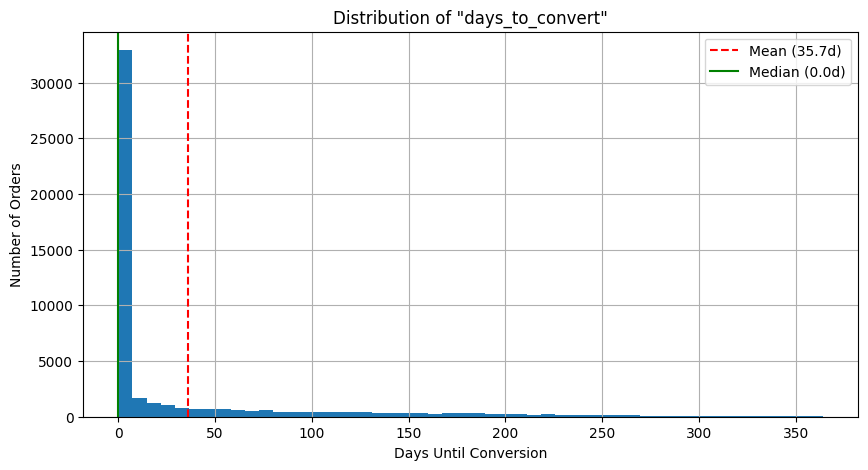

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
orders['days_to_convert'].hist(bins=50)
plt.title('Distribution of "days_to_convert"')
plt.xlabel('Days Until Conversion')
plt.ylabel('Number of Orders')
plt.grid(True)

#Highlight mean and median
mean_dt = orders['days_to_convert'].mean()
median_dt = orders['days_to_convert'].median()
plt.axvline(mean_dt, color='red', linestyle='--', label=f'Mean ({mean_dt:.1f}d)')
plt.axvline(median_dt, color='green', linestyle='-', label=f'Median ({median_dt:.1f}d)')
plt.legend()

plt.show()

* The tallest bar at zero confirms that about 50% of users convert on the same day they first visit.

* There’s a long right tail—some users take up to 364 days to convert.

* The red dashed line marks the mean (~35.7 days) and the green solid line marks the median (0 days), highlighting that most conversions happen immediately but a small group waits much longer.

This insight can help you target remarketing efforts within the first few days after a user’s initial visit.
***



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Aqui seria bem legal ilustrar essa sessão com um histograma mostrando a distribuição dessa variável.
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>

# Step 6 - Compute LTV by Cohort

*Now we will work trying to find how much gross profit each acquisition cohort generates over time.*
***

**6.1 Build a cohort-level revenue table**

In [21]:
#Gross-profit margin assumption
MARGIN_RATE = 0.40

#Aggregate revenue per (first_order_month, order_month)
cohort_rev = (orders.groupby(['first_order_month', 'order_month'])['Revenue'].sum().reset_index())

#Attach cohort size (buyers) to each row
cohort_rev = cohort_rev.merge(cohort_sizes.reset_index(), on='first_order_month')

#Compute gross profit and cohort age (months since acquisition)
cohort_rev['gross_profit'] = cohort_rev['Revenue'] * MARGIN_RATE
cohort_rev['age'] = (cohort_rev['order_month'].astype(int) - cohort_rev['first_order_month'].astype(int))

#LTV = Gross profit per buyer for that cohort age
cohort_rev['ltv'] = cohort_rev['gross_profit'] / cohort_rev['n_buyers']

print(cohort_rev.head())

  first_order_month order_month  Revenue  n_buyers  gross_profit  age  \
0           2017-06     2017-06  9557.49      2023      3822.996    0   
1           2017-06     2017-07   981.82      2023       392.728    1   
2           2017-06     2017-08   885.34      2023       354.136    2   
3           2017-06     2017-09  1931.30      2023       772.520    3   
4           2017-06     2017-10  2068.58      2023       827.432    4   

        ltv  
0  1.889766  
1  0.194131  
2  0.175055  
3  0.381869  
4  0.409012  


**6.2 Pivot to an LTV matrix (rows = cohort, cols = age)**

In [22]:
ltv_pivot = cohort_rev.pivot(
    index='first_order_month',
    columns='age',
    values='ltv'
).round(2)

display(ltv_pivot.head())

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.89,0.19,0.18,0.38,0.41,0.29,0.38,0.23,0.22,0.24,0.23,0.1
2017-07,2.40,0.13,0.25,0.14,0.07,0.06,0.05,0.06,0.06,0.06,0.06,NaN
2017-08,2.11,0.19,0.18,0.16,0.20,0.11,0.08,0.16,0.12,0.08,NaN,NaN
2017-09,2.26,0.45,0.21,1.59,0.16,0.26,0.28,0.10,0.07,NaN,NaN,NaN
2017-10,2.00,0.21,0.08,0.06,0.06,0.05,0.03,0.05,NaN,NaN,NaN,NaN


***

**2017-06 -** $1.89 gross-profit per buyer in the first month, then small steady gain, also an acumulative of $4.5 by month 11.


**2017-07 -** Higher month-0 ($2.40) but almost flat afterward → campaign brought in early buyers who didn’t keep spending.


**2017-09 -** Month-3 spike (age 3 → $1.59). Likely a seasonal event, promo, or content drop that revived purchases.

***

**6.3 Optional: Cumulative LTV**

In [23]:
ltv_cum = ltv_pivot.cumsum(axis=1).round(2)
display(ltv_cum.head())

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.89,2.08,2.26,2.64,3.05,3.34,3.72,3.95,4.17,4.41,4.64,4.74
2017-07,2.40,2.53,2.78,2.92,2.99,3.05,3.10,3.16,3.22,3.28,3.34,NaN
2017-08,2.11,2.30,2.48,2.64,2.84,2.95,3.03,3.19,3.31,3.39,NaN,NaN
2017-09,2.26,2.71,2.92,4.51,4.67,4.93,5.21,5.31,5.38,NaN,NaN,NaN
2017-10,2.00,2.21,2.29,2.35,2.41,2.46,2.49,2.54,NaN,NaN,NaN,NaN




<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Tudo certo com os cálculos. Seria importante incluir aqui conclusões intermediárias sobre o LTV.

</div>




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>

# Step 7 - Marketing Spend, CAC & ROMI

*Let's relate money spent on acquisition to the value generated by each cohort.*

***

**On This Step we'll do the Followings:**

*- Aggregate marketing costs by month;*

*- Merge those costs into cohort_rev (matching on `first_order_month`);*

*- Compute:*

* `CAC` (Cost per Acquired Customer) = marketing cost ÷ cohort size

* `ROMI` (Return on Marketing Investment) = LTV ÷ CAC

**7.1 Aggregating Monthly Costs**

In [24]:
monthly_costs = (costs.groupby(costs['date'].dt.to_period('M'))['costs'].sum().rename('monthly_cost'))

**7.2 Merge into the cohort table**

In [25]:
report = cohort_rev.merge(monthly_costs.reset_index().rename(columns={'date': 'first_order_month'}),on='first_order_month',how='left')

**7.3 Computing CAC and ROMI**

In [26]:
report['cac']  = report['monthly_cost'] / report['n_buyers']
report['romi'] = report['ltv'] / report['cac']

**7.4 Pivot to Cumulative ROMI**

In [27]:
romi_pivot = report.pivot(
    index='first_order_month',
    columns='age',
    values='romi'
)
romi_cum = romi_pivot.cumsum(axis=1).round(2)
display(romi_cum.head())

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.21,0.23,0.25,0.30,0.34,0.38,0.42,0.44,0.47,0.50,0.52,0.53
2017-07,0.25,0.27,0.29,0.31,0.32,0.32,0.33,0.33,0.34,0.35,0.35,NaN
2017-08,0.20,0.21,0.23,0.24,0.26,0.27,0.28,0.30,0.31,0.31,NaN,NaN
2017-09,0.24,0.29,0.31,0.48,0.49,0.52,0.55,0.56,0.57,NaN,NaN,NaN
2017-10,0.24,0.26,0.27,0.28,0.29,0.29,0.30,0.30,NaN,NaN,NaN,NaN


*The 2017's cohorts have not paid back their acquisition cost within a year. We need to know which traffic sources drive that CAC and decide where to trim spend.*


***

# Step 8 - Drill down by Traffic Source & Craft Recommendations

*We’ll break* `CAC/ROMI` *down per* `source_id` *to see which channels are inefficient.*


***

**8.1 Aggregate Monthly Cost per Source**

In [28]:
source_monthly_costs = (costs.groupby(['source_id', costs['date'].dt.to_period('M')])['costs'].sum().rename('source_monthly_cost'))

**8.2 Tagging Each User With Their Acquisition Source**

In [29]:
#Here we will assume that the first source is the same as the acquisition
first_source = (visits.sort_values('start_ts').groupby('Uid')['Source Id'].first().rename('acq_source'))


#If acq_source already present, drop it
if 'acq_source' in orders.columns:
    orders = orders.drop(columns='acq_source')

#Now attach the first-source information
orders = orders.join(first_source, on='Uid')

# Quick check
print(orders[['Uid', 'acq_source']].head())

                    Uid  acq_source
0  10329302124590727494         1.0
1  11627257723692907447         2.0
2  17903680561304213844         2.0
3  16109239769442553005         2.0
4  14200605875248379450         3.0


**8.3 Re-computing Cohort's Revenue by Acquisition Source**

In [30]:
#Aggregating marketing cost per source & month
source_monthly_costs = (
    costs.groupby(['source_id', costs['date'].dt.to_period('M')])['costs']
         .sum()
         .reset_index()
         .rename(columns={'source_id': 'acq_source',   #Here I had to rename columns because I was getting an error
                          'date':      'first_order_month',
                          'costs':     'source_monthly_cost'})
)

#Building cohort revenue by acquisition source
cohort_src = (
    orders.groupby(['acq_source', 'first_order_month', 'order_month'])['Revenue']
          .sum()
          .reset_index()
)

#Merging cohort size and the renamed cost table
cohort_src = (
    cohort_src
      .merge(cohort_sizes.reset_index(), on='first_order_month')
      .merge(source_monthly_costs, on=['acq_source', 'first_order_month'])
)

#Computing GP, Age, LTV, CAC, ROMI
cohort_src['gp']  = cohort_src['Revenue'] * MARGIN_RATE
cohort_src['age'] = (
    cohort_src['order_month'].astype(int) - cohort_src['first_order_month'].astype(int)
)
cohort_src['ltv'] = cohort_src['gp'] / cohort_src['n_buyers']
cohort_src['cac'] = cohort_src['source_monthly_cost'] / cohort_src['n_buyers']
cohort_src['romi'] = cohort_src['ltv'] / cohort_src['cac']

#Pivoting to cumulative ROMI
romi_by_src = (
    cohort_src.pivot_table(index=['acq_source', 'first_order_month'],
                           columns='age', values='romi')
    .cumsum(axis=1)
    .round(2)
)

display(romi_by_src.head(10))

age                             0     1     2     3     4     5     6     7   \
acq_source first_order_month                                                   
1.0        2017-06            0.47  0.62  0.76  0.91  1.15  1.26  1.39  1.52   
           2017-07            0.45  0.52  0.84  0.93  0.98  1.03  1.06  1.10   
           2017-08            0.36  0.42  0.48  0.52  0.57  0.60  0.64  0.76   
           2017-09            0.38  0.49  0.54  0.61  0.61  0.62  0.63  0.65   
           2017-10            0.35  0.41  0.43  0.45  0.46  0.46  0.47  0.49   
           2017-11            0.40  0.44  0.49  0.53  0.54  0.55  0.55   NaN   
           2017-12            0.26  0.28  0.30  0.31  0.31  0.32   NaN   NaN   
           2018-01            0.26  0.26  0.27  0.31  0.31   NaN   NaN   NaN   
           2018-02            0.24  0.29  0.29  0.30   NaN   NaN   NaN   NaN   
           2018-03            0.56  0.67  0.72   NaN   NaN   NaN   NaN   NaN   

age                             8     9     10    11  
acq_source first_order_month                          
1.0        2017-06            1.63  1.70  1.76  1.88  
           2017-07            1.15  1.21  1.26   NaN  
           2017-08            0.87  0.90   NaN   NaN  
           2017-09            0.70   NaN   NaN   NaN  
           2017-10             NaN   NaN   NaN   NaN  
           2017-11             NaN   NaN   NaN   NaN  
           2017-12             NaN   NaN   NaN   NaN  
           2018-01             NaN   NaN   NaN   NaN  
           2018-02             NaN   NaN   NaN   NaN  
           2018-03             NaN   NaN   NaN   NaN

Source 1 repays its acquisition cost a little after 4 months and returns $1.88 per marketing dollar within a year.


***

**8.4 Pivot - Cumulative ROMI per Source**

In [31]:
romi_by_src = (cohort_src.pivot_table(index=['acq_source','first_order_month'],columns='age',values='romi').cumsum(axis=1).round(2))


display(romi_by_src.head(10))

age                             0     1     2     3     4     5     6     7   \
acq_source first_order_month                                                   
1.0        2017-06            0.47  0.62  0.76  0.91  1.15  1.26  1.39  1.52   
           2017-07            0.45  0.52  0.84  0.93  0.98  1.03  1.06  1.10   
           2017-08            0.36  0.42  0.48  0.52  0.57  0.60  0.64  0.76   
           2017-09            0.38  0.49  0.54  0.61  0.61  0.62  0.63  0.65   
           2017-10            0.35  0.41  0.43  0.45  0.46  0.46  0.47  0.49   
           2017-11            0.40  0.44  0.49  0.53  0.54  0.55  0.55   NaN   
           2017-12            0.26  0.28  0.30  0.31  0.31  0.32   NaN   NaN   
           2018-01            0.26  0.26  0.27  0.31  0.31   NaN   NaN   NaN   
           2018-02            0.24  0.29  0.29  0.30   NaN   NaN   NaN   NaN   
           2018-03            0.56  0.67  0.72   NaN   NaN   NaN   NaN   NaN   

age                             8     9     10    11  
acq_source first_order_month                          
1.0        2017-06            1.63  1.70  1.76  1.88  
           2017-07            1.15  1.21  1.26   NaN  
           2017-08            0.87  0.90   NaN   NaN  
           2017-09            0.70   NaN   NaN   NaN  
           2017-10             NaN   NaN   NaN   NaN  
           2017-11             NaN   NaN   NaN   NaN  
           2017-12             NaN   NaN   NaN   NaN  
           2018-01             NaN   NaN   NaN   NaN  
           2018-02             NaN   NaN   NaN   NaN  
           2018-03             NaN   NaN   NaN   NaN



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Essa segunda versão do ROI está correta. Muito bom!
    
Conclusões apresentadas abaixo.
</div>


# Step 9 - Conclusions & Recommendations

## Conclusions & Actionable Recommendations

**Top-performing channel:** source 1
* Payback period ≈ 4 months, 1-year ROMI ≈ 1.9  
* Recommendation: increase budget 20-30 % and monitor CAC.

**Under-performing channels:** sources X, Y, …
* Cumulative ROMI < 0.5 after 12 m  
* Recommendation: pause campaigns; renegotiate bids or creatives.

**Product insight:** sticky-WAU 16 % and median 5-minute sessions imply healthy daily engagement; focus on raising frequency (push-notifications, loyalty perks).

**Next steps**
1. A/B-test deeper retention features to push DAU/WAU.
2. Re-run this analysis quarterly to track CAC and ROMI shifts.
